In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("hour.csv",parse_dates=['dteday'])

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [5]:
data.shape

(17379, 17)

In [6]:
data.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [7]:
cat_cols = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']

In [8]:
data[cat_cols] = data[cat_cols].astype('object')

In [9]:
cat_cols = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
data[cat_cols] = data[cat_cols].astype('object')
data = pd.get_dummies(data)

In [10]:
data.head()

,instant,dteday,yr,mnth,hr,temp,atemp,hum,windspeed,casual,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,1,0,0.24,0.2879,0.81,0.0,3,...,0,0,0,1,1,0,1,0,0,0
1,2,2011-01-01,0,1,1,0.22,0.2727,0.80,0.0,8,...,0,0,0,1,1,0,1,0,0,0
2,3,2011-01-01,0,1,2,0.22,0.2727,0.80,0.0,5,...,0,0,0,1,1,0,1,0,0,0
3,4,2011-01-01,0,1,3,0.24,0.2879,0.75,0.0,3,...,0,0,0,1,1,0,1,0,0,0
4,5,2011-01-01,0,1,4,0.24,0.2879,0.75,0.0,0,...,0,0,0,1,1,0,1,0,0,0


In [11]:
data['day'] = data['dteday'].dt.day

In [12]:
data.head()

,instant,dteday,yr,mnth,hr,temp,atemp,hum,windspeed,casual,...,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day
0,1,2011-01-01,0,1,0,0.24,0.2879,0.81,0.0,3,...,0,0,1,1,0,1,0,0,0,1
1,2,2011-01-01,0,1,1,0.22,0.2727,0.80,0.0,8,...,0,0,1,1,0,1,0,0,0,1
2,3,2011-01-01,0,1,2,0.22,0.2727,0.80,0.0,5,...,0,0,1,1,0,1,0,0,0,1
3,4,2011-01-01,0,1,3,0.24,0.2879,0.75,0.0,3,...,0,0,1,1,0,1,0,0,0,1
4,5,2011-01-01,0,1,4,0.24,0.2879,0.75,0.0,0,...,0,0,1,1,0,1,0,0,0,1


In [13]:
data[['yr','mnth','hr','day','temp','atemp','hum','windspeed', 'cnt']].corr()

,yr,mnth,hr,day,temp,atemp,hum,windspeed,cnt
yr,1.000000,-0.010473,-0.003867,0.002057,0.040913,0.039222,-0.083546,-0.008740,0.250495
mnth,-0.010473,1.000000,-0.005772,0.007929,0.201691,0.208096,0.164411,-0.135386,0.120638
hr,-0.003867,-0.005772,1.000000,0.001538,0.137603,0.133750,-0.276498,0.137252,0.394071
day,0.002057,0.007929,0.001538,1.000000,0.027180,0.021269,0.025663,0.010505,-0.004312
temp,0.040913,0.201691,0.137603,0.027180,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.039222,0.208096,0.133750,0.021269,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.083546,0.164411,-0.276498,0.025663,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.008740,-0.135386,0.137252,0.010505,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.250495,0.120638,0.394071,-0.004312,0.404772,0.400929,-0.322911,0.093234,1.000000


In [14]:
data2 = data.drop(['instant','dteday','casual','registered','cnt'],axis=1)

In [15]:
data2.head()

,yr,mnth,hr,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day
0,0,1,0,0.24,0.2879,0.81,0.0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
1,0,1,1,0.22,0.2727,0.80,0.0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
2,0,1,2,0.22,0.2727,0.80,0.0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
3,0,1,3,0.24,0.2879,0.75,0.0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
4,0,1,4,0.24,0.2879,0.75,0.0,1,0,0,...,0,0,1,1,0,1,0,0,0,1


In [16]:
num_cols = ['yr','mnth','hr','day','temp','atemp','hum','windspeed']

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

C:\Users\lmwlm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lmwlm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lmwlm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

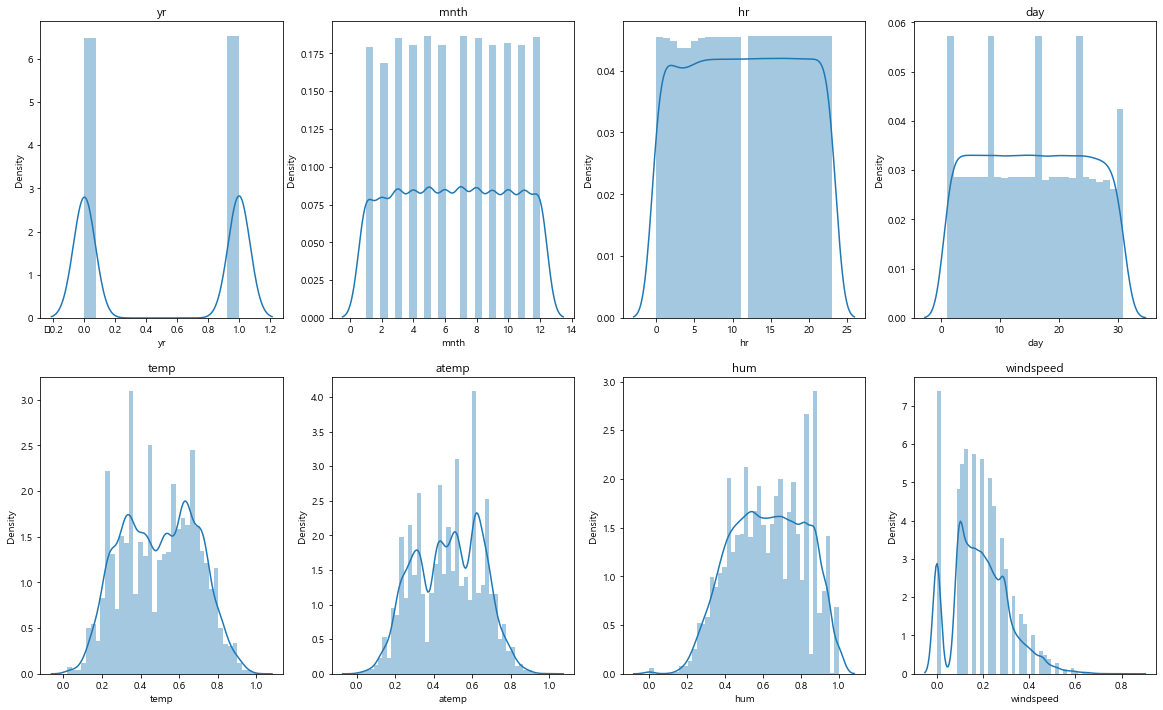

In [18]:
fig = plt.figure(figsize=(20,12))
for i in range(len(num_cols)):
    ax = fig.add_subplot(2,4,i+1)
    ax = sns.distplot(data2[num_cols[i]])
    plt.title(num_cols[i])

C:\Users\lmwlm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

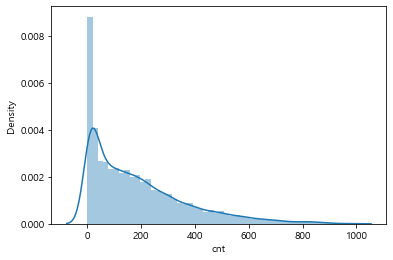

In [19]:
sns.distplot(data['cnt'])

C:\Users\lmwlm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lmwlm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lmwlm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lmwlm\anacond

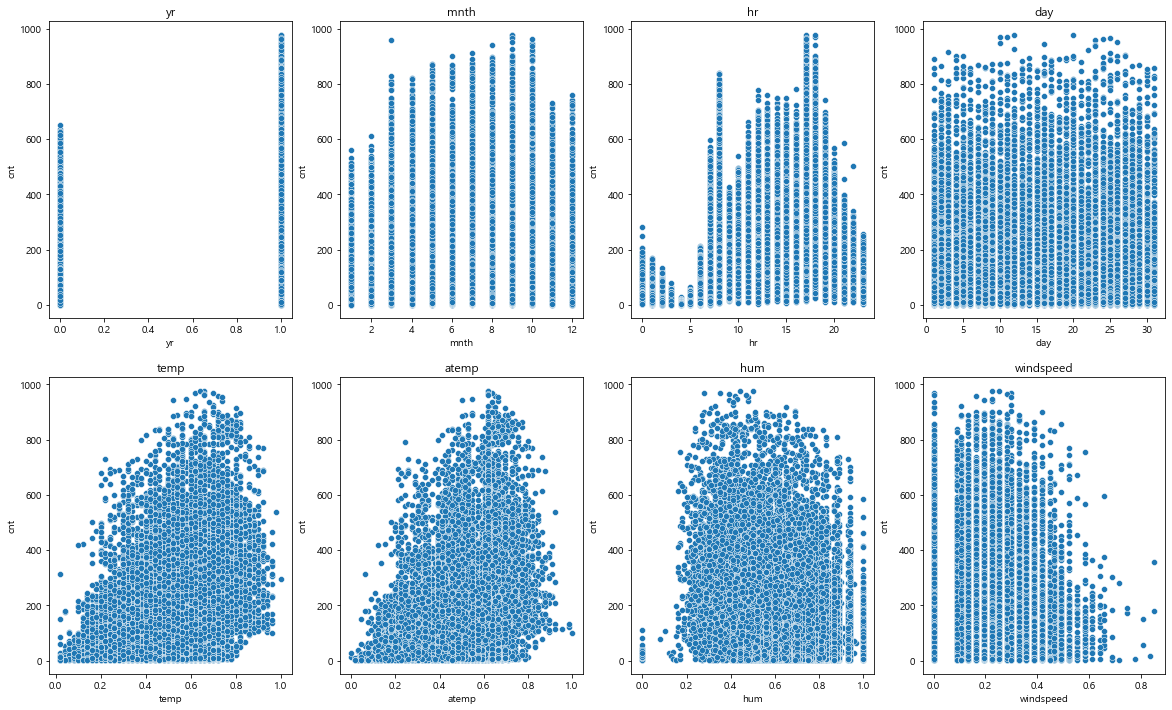

In [20]:
fig = plt.figure(figsize=(20,12))
for i in range(len(num_cols)):
    ax = fig.add_subplot(2,4,i+1)
    ax = sns.scatterplot(data2[num_cols[i]],data['cnt'])
    plt.title(num_cols[i])

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data2[num_cols] = sc.fit_transform(data2[num_cols])

In [22]:
data2.head()

,yr,mnth,hr,temp,atemp,hum,windspeed,season_1,season_2,season_3,...,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,day
0,-1.005134,-1.610438,-1.670004,-1.334648,-1.093281,0.947372,-1.553889,1,0,0,...,0,0,1,1,0,1,0,0,0,-1.670635
1,-1.005134,-1.610438,-1.525374,-1.438516,-1.181732,0.895539,-1.553889,1,0,0,...,0,0,1,1,0,1,0,0,0,-1.670635
2,-1.005134,-1.610438,-1.380744,-1.438516,-1.181732,0.895539,-1.553889,1,0,0,...,0,0,1,1,0,1,0,0,0,-1.670635
3,-1.005134,-1.610438,-1.236115,-1.334648,-1.093281,0.636370,-1.553889,1,0,0,...,0,0,1,1,0,1,0,0,0,-1.670635
4,-1.005134,-1.610438,-1.091485,-1.334648,-1.093281,0.636370,-1.553889,1,0,0,...,0,0,1,1,0,1,0,0,0,-1.670635


In [23]:
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [26]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

Training MSE: 25900.740
Training RMSE: 160.937
Training MAE: 106.645
Training MAPE: 141.872
Training R2: 0.226
---------------------------------------------------------
Testing MSE: 24034.052
Testing RMSE: 155.029
Testing MAE: 102.058
Testing MAPE: 148.921
Testing R2: 0.239
---------------------------------------------------------


C:\Users\lmwlm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     382.8
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:49:11   Log-Likelihood:                -77538.
No. Observations:               12165   AIC:                         1.551e+05
Df Residuals:                   12143   BIC:                         1.553e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           69.4859      9.499      7.315   

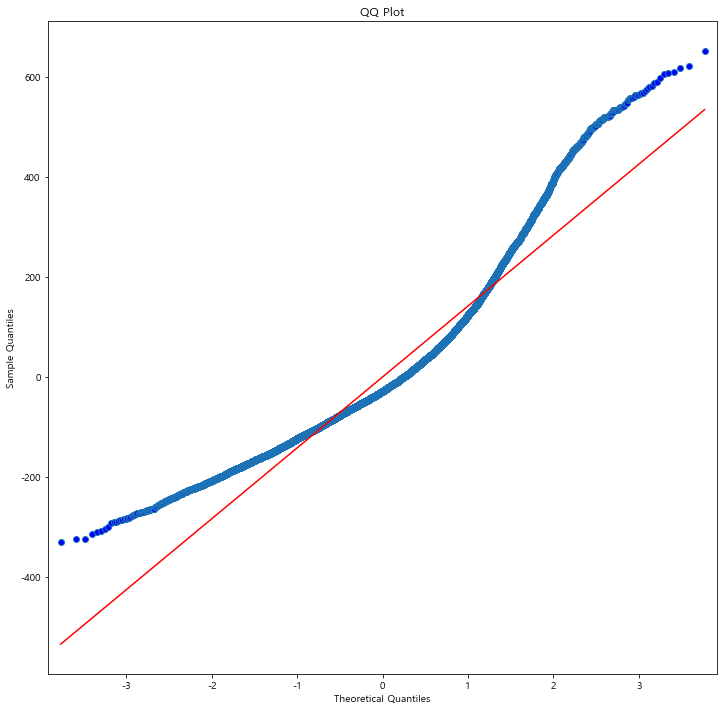

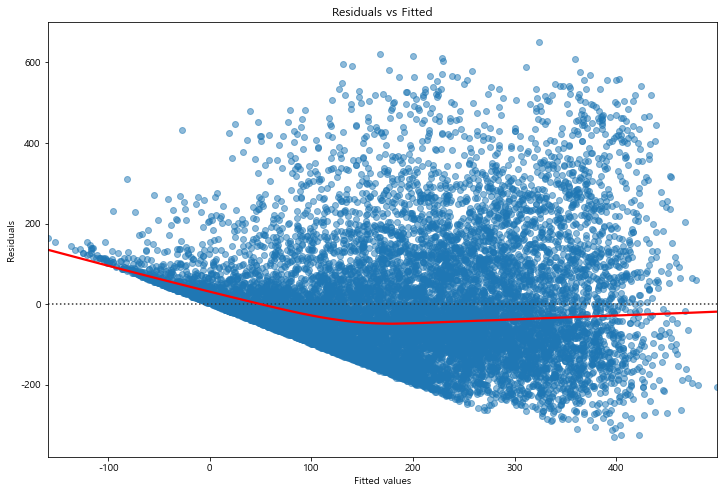

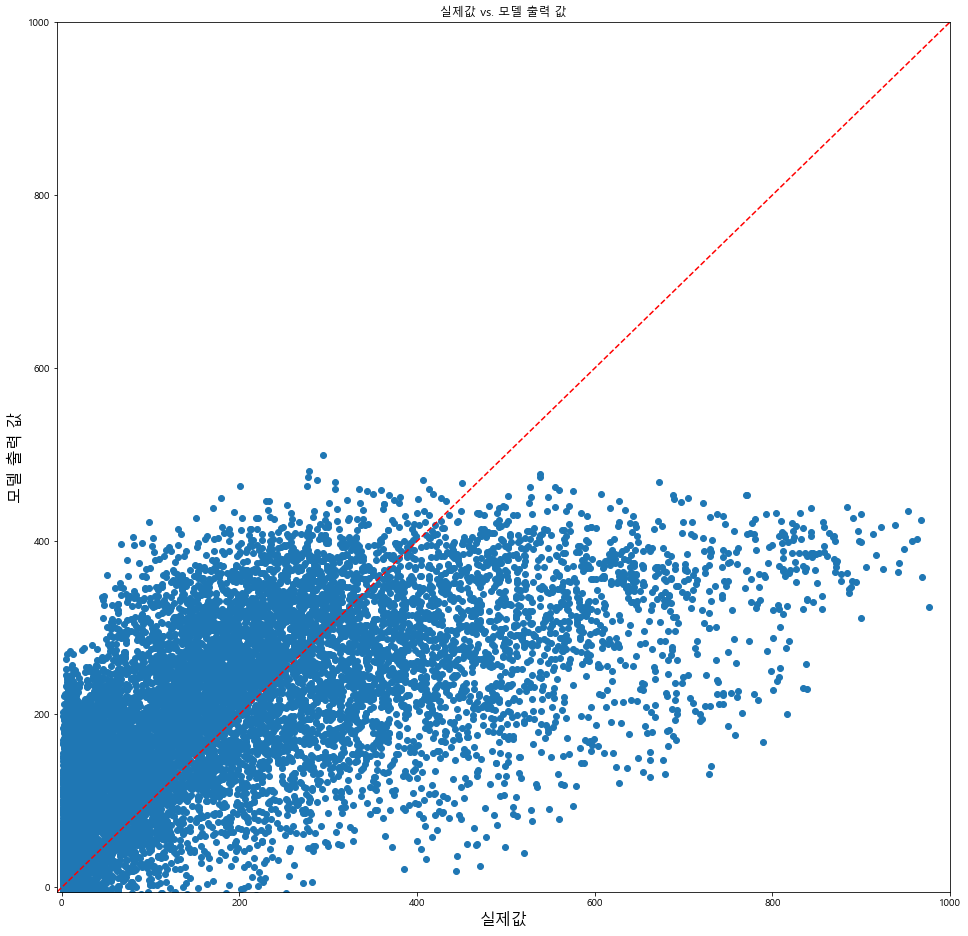

Training MSE: 20125.910
Training RMSE: 141.866
Training MAE: 106.227
Training MAPE: 334.225
Training R2: 0.398
---------------------------------------------------------
Testing MSE: 18993.079
Testing RMSE: 137.815
Testing MAE: 103.933
Testing MAPE: 365.214
Testing R2: 0.399
---------------------------------------------------------


In [27]:
X_train, X_test, y_train, y_test = train_test_split(data2, data['cnt'], test_size=0.3, random_state=42)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

model_residuals = model_trained.resid
plt.rcParams['axes.unicode_minus'] = False 
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)
sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

model_fitted_y= model_trained.fittedvalues
fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)
sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

print(model_trained.summary())
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(16, 16))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 1000], [-5, 1000], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 1000)
plt.ylim(-5, 1000)
plt.show()

X_test = sm.add_constant(X_test) 
y_test_pred = model_trained.predict(X_test)
y_test_pred.head()

print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('---------------------------------------------------------')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('---------------------------------------------------------')

C:\Users\lmwlm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     573.0
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:49:38   Log-Likelihood:                -17318.
No. Observations:               12165   AIC:                         3.468e+04
Df Residuals:                   12143   BIC:                         3.484e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7173      0.067     25.528   

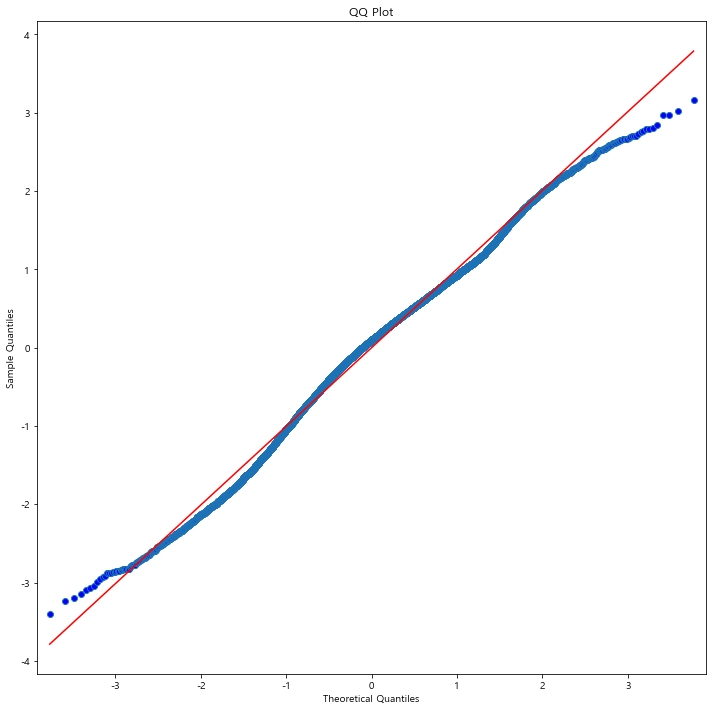

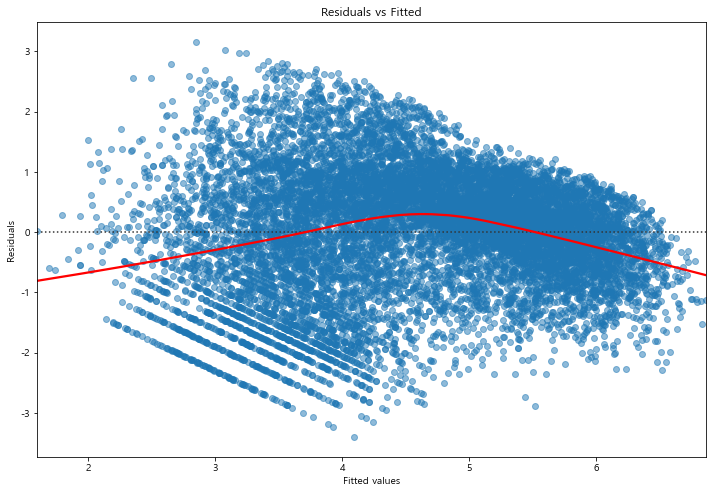

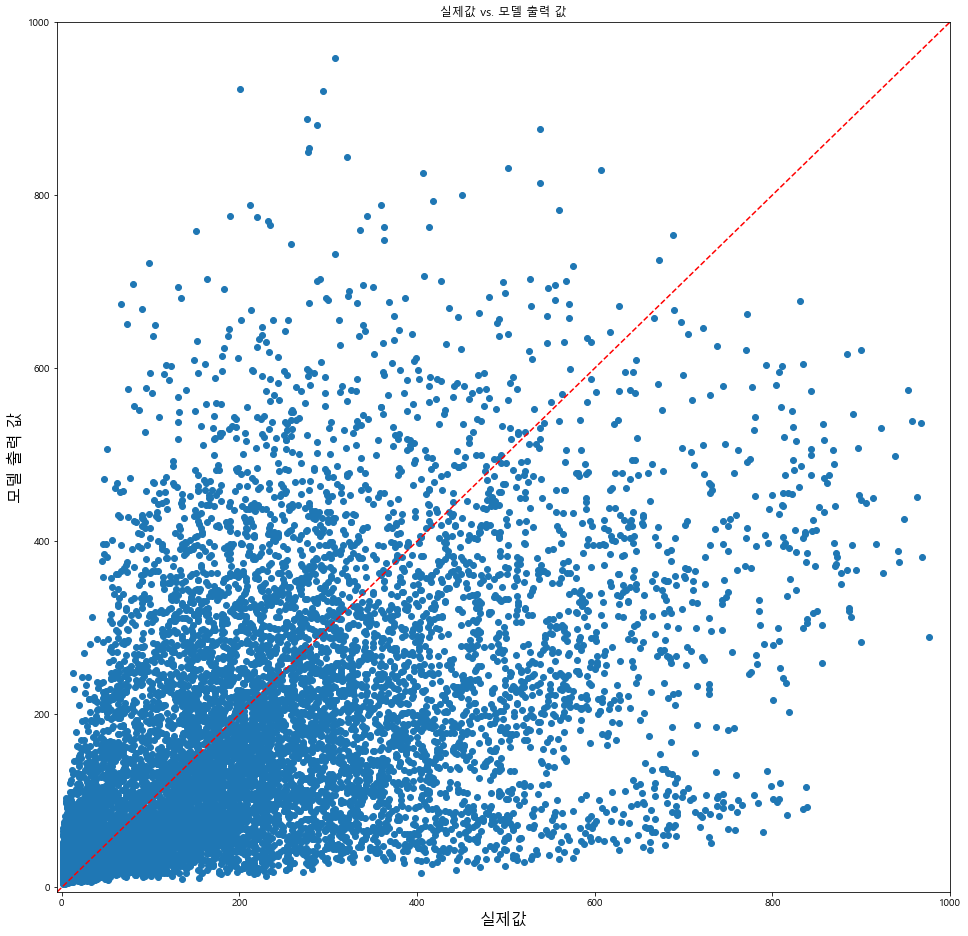

Training MSE: 25900.740
Training RMSE: 160.937
Training MAE: 106.645
Training MAPE: 141.872
Training R2: 0.226
---------------------------------------------------------
Testing MSE: 24034.052
Testing RMSE: 155.029
Testing MAE: 102.058
Testing MAPE: 148.921
Testing R2: 0.239
---------------------------------------------------------


In [28]:
y = np.log1p(data['cnt'])
X_train, X_test, y_train, y_test = train_test_split(data2, y, test_size=0.3, random_state=42)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

model_residuals = model_trained.resid
plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)
sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

model_fitted_y= model_trained.fittedvalues
fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)
sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

print(model_trained.summary())
y_train_pred = model_trained.fittedvalues
y_train_pred = np.expm1(y_train_pred)
y_train = np.expm1(y_train)

plt.figure(figsize=(16, 16))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 1000], [-5, 1000], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 1000)
plt.ylim(-5, 1000)
plt.show()

X_test = sm.add_constant(X_test) 
y_test_pred = np.expm1(model_trained.predict(X_test))
y_test = np.expm1(y_test)
y_test_pred.head()

print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))
print('---------------------------------------------------------')
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))
print('---------------------------------------------------------')